# Context

The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, body mass index (bmi), children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

## Acknowledgements

Insurance.csv file is obtained from the Machine Learning course website (Spring 2017) from Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6 This link is no longer working but many reference from this dataset makes reference to this link at Kaggle https://www.kaggle.com/noordeen/insurance-premium-prediction

Here is a link to Prof. Suess website in case of additional questions

http://cox.csueastbay.edu/~esuess/#prof-eric-a-suesss-website



In [503]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [504]:
insdf = pd.read_csv('insurance.csv')

In [505]:
insdf.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [506]:
insdf.rename(columns = {'expenses':'charges'}, inplace = True) 

In [507]:
insdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [508]:
insdf.shape

(1338, 7)

In [509]:
insdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [510]:
insdf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [511]:
insdf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [512]:
insdf.corr()['charges'].value_counts()

0.299008    1
0.067998    1
0.198576    1
1.000000    1
Name: charges, dtype: int64

In [513]:
insdf.corr()

,age,bmi,children,charges
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
charges,0.299008,0.198576,0.067998,1.000000


In [514]:
insdf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data Analysis (EDA)

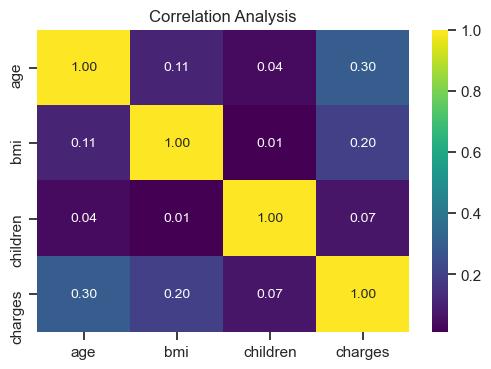

In [515]:
corr = insdf.corr()
#mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,annot=True,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")


In [516]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR') # This line take care of the ERROR generated by the graphic bellow

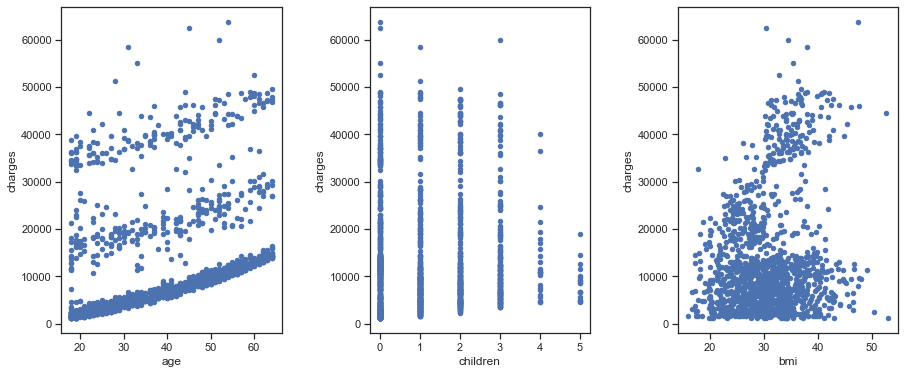

In [517]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
insdf.plot(kind='scatter', x='age', y='charges', ax=axes[0])
insdf.plot(kind='scatter', x='children', y='charges', ax=axes[1])
insdf.plot(kind='scatter', x='bmi', y='charges', ax=axes[2])

Possible interpretation from scatterplots:

1. x = 'age' and y = 'charges'
Here it is clear that with an increase in age there is a clear increase in charges but there is also some sort of boundary one could say that this is a good indication to use Linear Regression to predict charges based on attributes since there seem to be some sort of linear correlation althought they are also seperated

or Support Vector Mechine (SVM) algorithm for classifiction since some sort of linear decision boundary could fit inbetween the gaps in this graph (1) and one could then use the decision boundary to classify the charges 


2. x = 'children' and y = 'charges'
Here it is clear that the people with no children have the highest variance comapre to those with 5 children


3. x = 'body mass index(bmi)' and y = 'charges'
Cannot really make an assumption from this graph maybe 'hue' could assist with this interpretation to make image a bit more clear


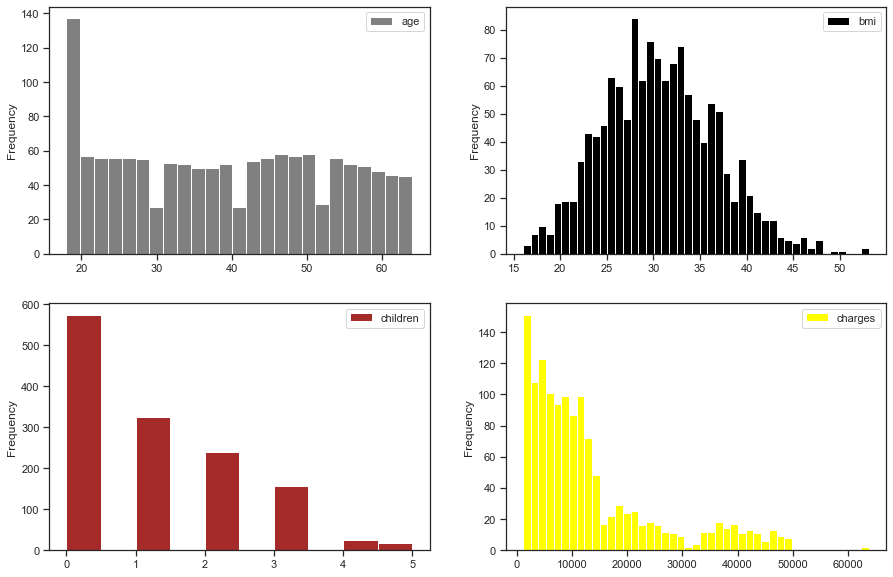

In [518]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

insdf.plot(kind='hist', y='age', ax=axes[0][0], color = 'grey', bins = 25)
insdf.plot(kind='hist', y='bmi', ax=axes[0][1], color = 'black', bins = 45)
insdf.plot(kind='hist', y='children', ax=axes[1][0], color = 'brown', bins = 10)
insdf.plot(kind='hist', y='charges', ax=axes[1][1], color = 'yellow', bins = 45)

Possible interpretation from Histograms:

1. Frequency of 'age'
Clearly a very high range of young people 10 < frequency < 22, this is also a good time to start with insurance as the premiums are also low and they dont really increase as much as if you start later but logical see above point 1 and corresponding graph


2. Frequency of 'body mass index (bmi)'
Normal distribution with 28 < mean < 33, but some indept calculation would be needed if this would be required 



3. Frequency of 'children'
High frequency of individuals without any children



4. Frequency of 'charges'
Highest frequency of charges :  750 < mean < 2000 


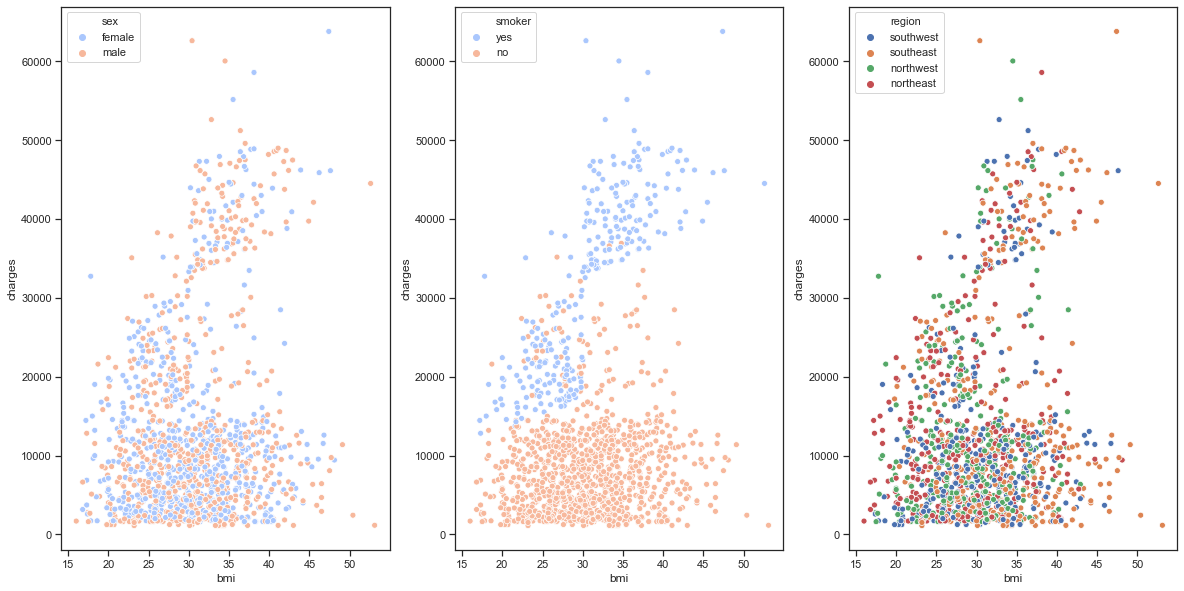

In [519]:
fig, axes = plt.subplots(ncols = 3, figsize = (20,10), squeeze=True)
sns.scatterplot(x='bmi', y='charges', ax=axes[0], data=insdf,hue='sex', palette='coolwarm')
sns.scatterplot(x='bmi', y='charges', ax=axes[1], data=insdf,hue='smoker', palette='coolwarm')
sns.scatterplot(x='bmi', y='charges', ax=axes[2], data=insdf,hue='region')

Possible interpretation from scatter plots with 'hue' indicators:

1. x = 'bmi', y = 'charges', hue = 'sex'
Similar charges between the sexes no real difference



2. x = 'bmi', y = 'charges', hue = 'smoker'
Massive difference in charges between smokers and non-smokers but this is obvious due to risk of smoking

Note: based on this data one could build a kNearest Neighbor (kNN) algorithm to cluster the data and build an algorithm to predict some features this is a good indication thereof



3. x = 'bmi', y = 'charges', hue = 'region'
Similar bmi between the region no real difference nothing really special to extract here 



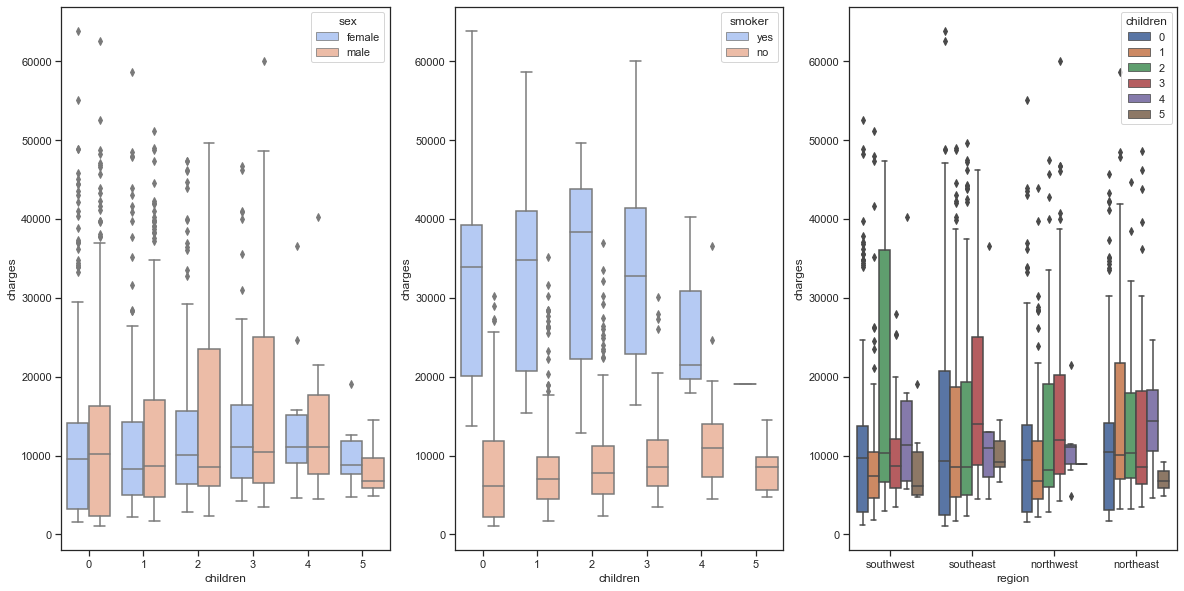

In [520]:
fig, axes = plt.subplots(ncols = 3, figsize = (20,10), squeeze=True)
sns.boxplot(x='children', y='charges', ax=axes[0], data=insdf,hue='sex', palette='coolwarm')
sns.boxplot(x='children', y='charges', ax=axes[1], data=insdf,hue='smoker', palette='coolwarm')
sns.boxplot(x='region', y='charges', ax=axes[2], data=insdf, hue='children')

Possible interpretation from box plots with 'hue' indicators:

1. x = 'children', y = 'charges', hue = 'sex'
The Upper and Lower Extreme Charges are quite different between male and female. As the amount of children increase so does this Upper and Lower Extreme Charges until the forth child then the Upper and Lower Extreme Charges decreases again. Large amount of outliers from 0 to 2 children, with little outliers from 3 - 5 children.



2. x = 'children, y = 'charges', hue = 'smoker'
Massive difference in charges between smokers and non-smokers, non-smokers get charged less than smoker obvious observation based on risk of smoking and charges. With more children the charges get smaller less for males, one could conclude that the more children the less males smoke. For femail the trends seems to be slighly increasing also an interesting observation. 

Note: based on this data one could build a kNearest Neighbor (kNN) algorithm to cluster the data and build an algorithm to predict some features this is a good indication 



3. x = 'region', y = 'charges', hue = 'children'
Similar bmi between the region no real difference nothing really special to extract here:

    South West: People with 2 children has the highest Upper Quartile charges, people with 0 children has the highest variance
    
    South East: People with 3 children get the highest Upper Quartile charges, people with 0 children has the highest variance
    
    North West: People with 3 children get charged the most, people with 5 children has the highest variance
    
    North Eest: People with 1 children get charged the most, people with 4 children has the highest variance
 

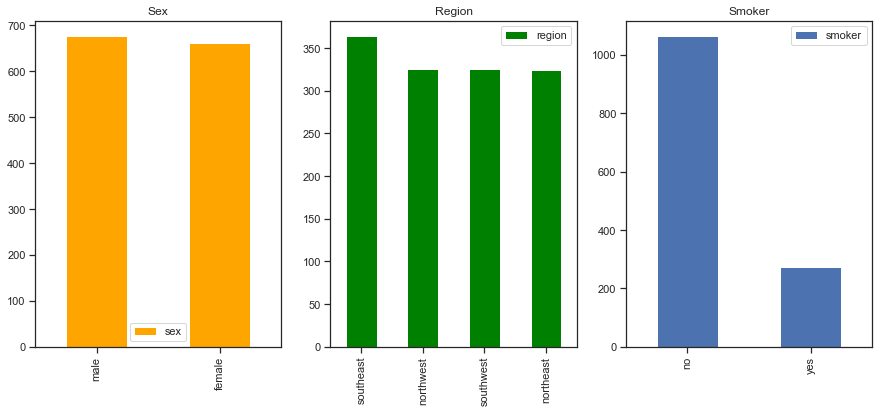

In [521]:
fig, axes = plt.subplots(ncols=3, figsize = (15,6))
insdf['sex'].value_counts().plot(kind='bar', color = 'orange', ax=axes[0],title="Sex", legend = 'sex') 
insdf['region'].value_counts().plot(kind='bar', color = 'green', ax=axes[1],title="Region", legend = 'region')
insdf['smoker'].value_counts().plot(kind='bar', ax=axes[2],title="Smoker", legend = 'smoker')

Possible interpretation from histograms with 'hue' indicators:

1. x = 'sex', y = 'value_count()'
More male then females but about +/- 20 people differnence



2. x = 'region', y = 'value_count()'
Most people from the 'southeast', similar amount of people from the rest of the regions 


3. x = 'smokers', y = 'value_count()'
High amount of non-smokers compared to smokers about 25 % of the people smoke and about 75 % are non smokers

## CREATE A TEST SET

Creating a test set is theorretically simple, selecting from the data randomly typically around 20% of the dataset i.e. if you have a very large dataset one can also select less data and set this dataset aside for after the training. 

This means that (+- 20 %) of the dataset (training data) will be used to study and construct a model and the remainding data (test data) from our dataset (+- 80 %) will be used to test our constructed model 

Text(0.5, 1.0, 'Distribution of Charges')

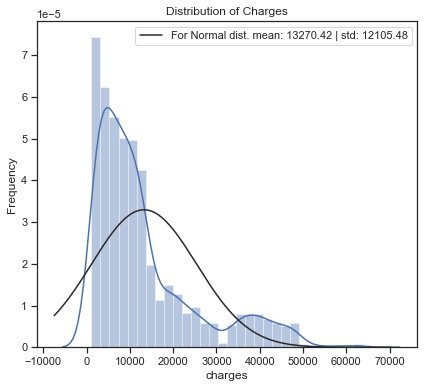

In [522]:
from scipy import stats
from scipy.stats import norm
fig =plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(insdf['charges'], fit=norm)
(mu,sigma)= norm.fit(insdf['charges'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of Charges')

Text(0.5, 1.0, 'Distribution of BMI')

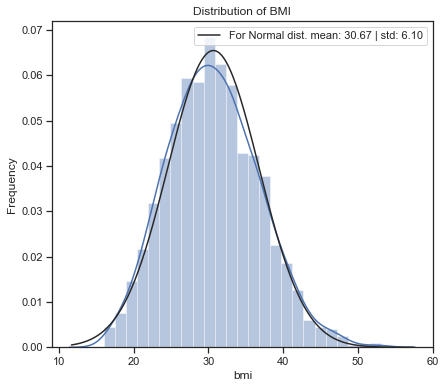

In [523]:
fig =plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(insdf['bmi'], fit=norm)
(mu,sigma)= norm.fit(insdf['bmi'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of BMI')

Text(0.5, 1.0, 'Distribution of Age')

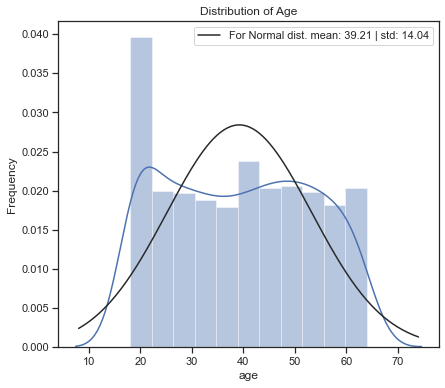

In [524]:
fig =plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(insdf['age'], fit=norm)
(mu,sigma)= norm.fit(insdf['age'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of Age')

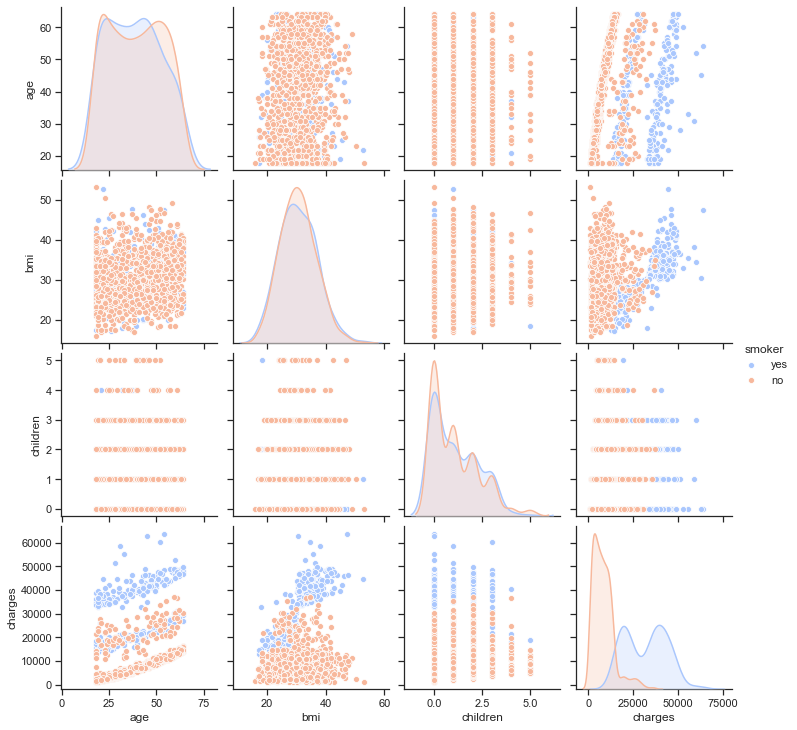

In [525]:
sns.set(style="ticks")
sns.pairplot(data=insdf, hue='smoker', palette='coolwarm')

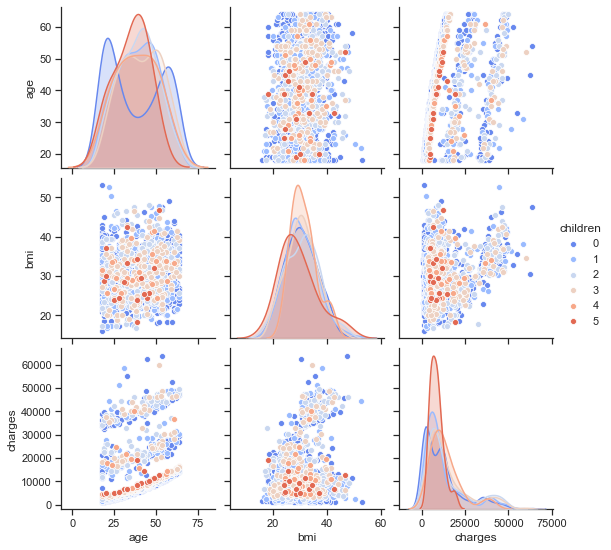

In [526]:
sns.set(style="ticks")
sns.pairplot(data=insdf, hue='children', palette='coolwarm')

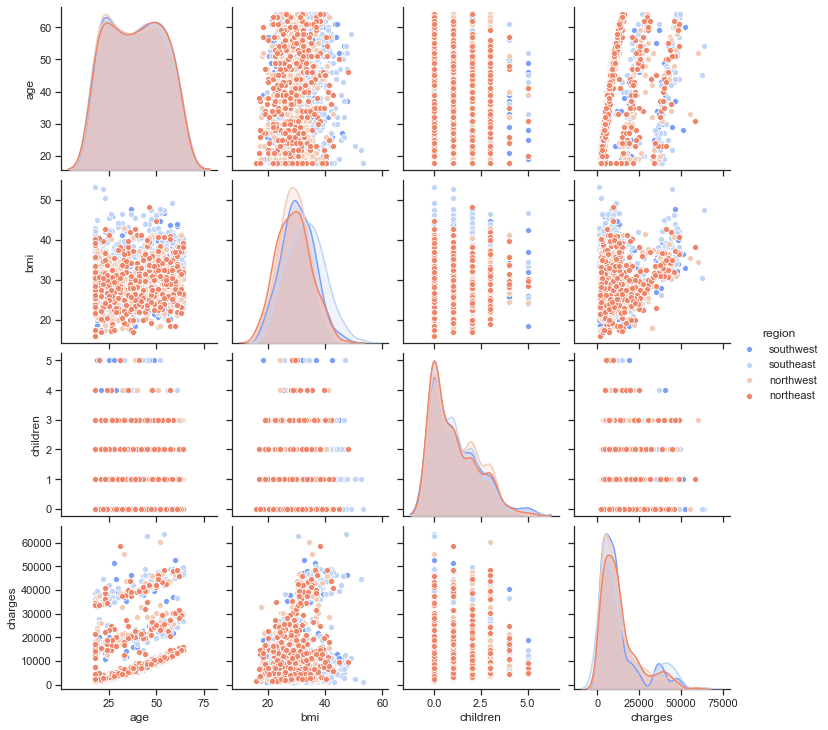

In [527]:
sns.set(style="ticks")
sns.pairplot(data=insdf, hue='region', palette='coolwarm')

In [528]:
insdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [529]:
insdf.drop(["region"], axis=1, inplace=True) 

In [530]:
insdf.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [531]:
# Changing binary categories to 1s and 0s
insdf['sex'] = insdf['sex'].map(lambda s :1  if s == 'female' else 0)
insdf['smoker'] = insdf['smoker'].map(lambda s :1  if s == 'yes' else 0)

In [532]:
insdf.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.9,0,1,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86


## CREATE A TEST SET

Creating a test set is theorretically simple, selecting from the data randomly typically around 20% of the dataset i.e. if you have a very large dataset one can also select less data and set this dataset aside for after the training. 

This means that (+- 20 %) of the dataset (training data) will be used to study and construct a model and the remainding data (test data) from our dataset (+- 80 %) will be used to test our constructed model 

In [533]:
from sklearn.model_selection import train_test_split

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. 

train_test_split has several parameters. 

X, y. The first parameter is the dataset you're selecting to use.

train_size. This parameter sets the size of the training dataset. 

There are three options: None, which is the default
Int, which requires the exact number of samples, and 
float, which ranges from 0.1 to 1.0.

test_size. This parameter specifies the size of the testing dataset. 

The default state suits the training size. It will be set to 0.25 if the training size is set to default.

random_state. The default mode performs a random split using np.random.

In [534]:
from sklearn.linear_model import LinearRegression

Linear regression is a popular regression learning algorithm that learns a model which is a linear combination of features of the input example.


In general, a binary logistic regression describes the relationship between the dependent binary variable and one or more independent variable/s.


The binary dependent variable has two possible outcomes:

These features are also present in our data set, therefore making this the logic algorithm of choice for this problem

Since we are interested in predicting the 'charges' feature we have to equate this feature to y

We also have to remove the 'charges' feature from the X parameter since this is the feature that we would like to predict, if we keep it would create a bias and our model would not be able to function propertly

In [535]:
X = insdf.drop(['charges'], axis = 1)
y = insdf.charges
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)

#CHECK IF THIS MIGHT FIX ERROR SVM GridSearch Model
#X = X.reshape(X.shape[1:])
#X = X.transpose()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

Shape of X:  (1338, 5)
Shape of y:  (1338,)
0.7952529674123328


.score() Return the coefficient of determination R^2 of the prediction

R^2 = 0.7952529674123328

In [536]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
578,9724.53,11456.260710
610,8547.69,9934.793123
569,45702.02,37778.385938
1034,12950.07,15858.505279
198,9644.25,6953.500191
...,...,...
574,13224.06,14430.265988
1174,4433.92,6701.983467
1327,9377.90,11141.700468
817,3597.60,7201.002180


Text(0, 0.5, 'Predicted Values')

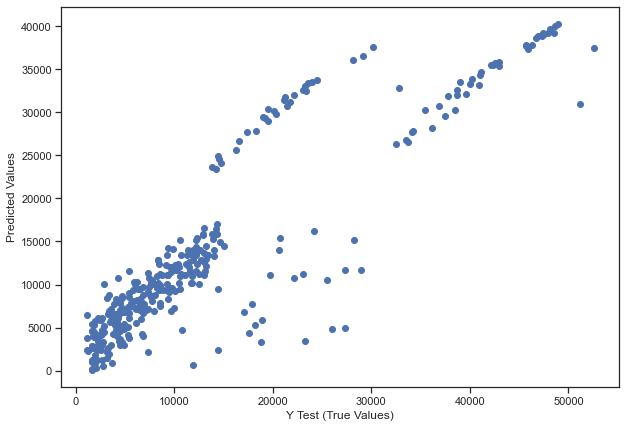

In [537]:
plt.figure(figsize = (10, 7))  # Make the figure larger
plt.scatter(y_test, y_test_pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

R^2 = 0.7952529674123328

Possible interpretation:

This is a very interesting observations as it is somewhat linear not the greatest linear trend but also it has some form of clustering.  This also has some non linear features. 

Linear Regression is surely not the only model to be tried on this data supervised algorithms:

1. Linear Regression [This is also quite obvious]


2. Support Vector Machines(SVM)

    a) LinearSVM
    
    b) Polynomial Features


3. Decision Tree and Random Forests


4. k-Nearest Neighbors (kNN) - [I look into possible model]




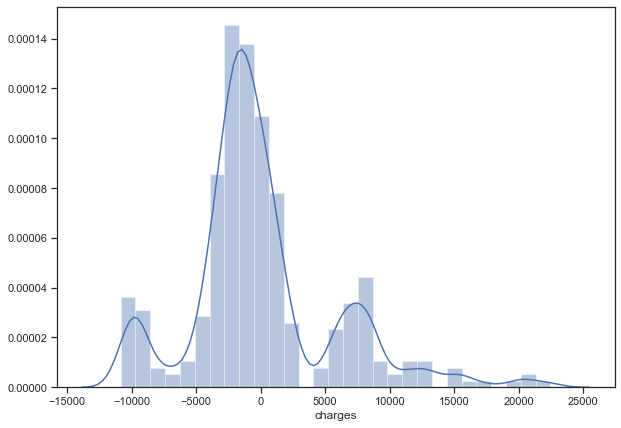

In [538]:
# Make the figure larger
plt.figure(figsize = (10, 7))
sns.distplot((y_test - y_test_pred)) 

# Feature Scaling 


Scikit-learn provides a transformation called StandardScaler for standardization  

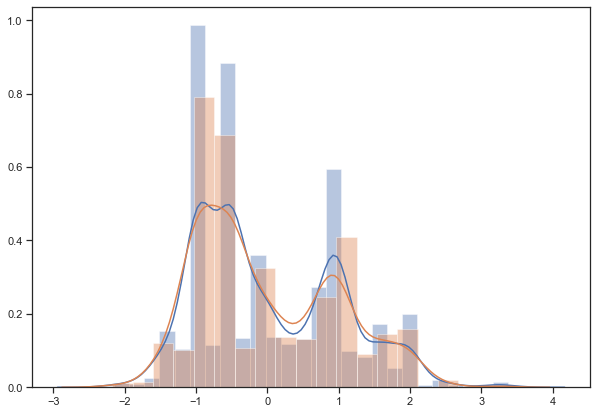

In [539]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

plt.figure(figsize = (10, 7))
sns.distplot((X_train))
sns.distplot((X_test)) 

StandardScaler. StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [540]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.514853,0.985155,-0.180051,-0.063607,-0.503736
1,1.548746,0.985155,-1.399832,-0.892144,-0.503736
2,-1.439915,-1.015069,-0.982538,-0.063607,-0.503736
3,-1.368757,0.985155,-1.014638,-0.892144,1.985167
4,-0.941805,0.985155,-1.367732,-0.892144,-0.503736


In [541]:
pd.DataFrame(y_train).head()

,charges
1075,4562.84
131,13616.36
15,1837.24
1223,26125.67
1137,3176.29


In [542]:
def lr_model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    
    accuracy_model_train = r2_score(y_train, y_pred_model_train)
    print("Training vs Predict r2_score: ", accuracy_model_train)
    
    accuracy_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing vs Predict r2_score: ", accuracy_model_test)
    
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training vs Predicted Data: ", RMSE_model_train)
    
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE for Testing vs Precidted Data: ", RMSE_model_test)
    
    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Score", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

In [543]:
from math import sqrt 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import r2_score, mean_squared_error  

In [544]:
from sklearn.linear_model import LinearRegression  


Linear regression is a popular regression learning algorithm that learns a model which is a linear combination of features of the input example.


In general, a binary logistic regression describes the relationship between the dependent binary variable and one or more independent variable/s.

The binary dependent variable has two possible outcomes:

These features are also present in our data set, therefore making this the logic algorithm of choice for this problem



In [545]:
multiple_linear_reg = LinearRegression(fit_intercept=False)  
multiple_linear_reg.fit(X_train, y_train)  
lr_model_summary(multiple_linear_reg, "Multiple_linear_Regression")

Multiple_linear_Regression
Training vs Predict r2_score:  -0.48955318862091035
Testing vs Predict r2_score:  -0.3240758269178261
RMSE for Training vs Predicted Data:  14589.270271020132
RMSE for Testing vs Precidted Data:  14437.978854833256
Score 20 - Fold Cross Predicted:  0.7164406277916135


Linear Regression Model Evaluation:

Here the 

 - Training Score (R^2) = -0.48955318862091035 &

 - Testing Score  (R^2) = -0.3240758269178261
         
This mean that the training score (R^2) performs better with than the Testing score both having negative slopes.


The next step is to select a performance measure, and a typical performance measure for regression problems is the Root Mean Square Error (RMSE). It is important as it gives an indication as to how much error the system typically makes in its predictions, with higher weights for larger errors.


- RMSE for Training Data:  14589.270271020132
- RMSE for Testing Data:  14437.978854833256

RMSE of the 'charges' in the Training Data prediction vs Model Prediction is about 150 appart from each other this is not a bad prediction.

- R^2 score for the 'charges' vs the predicted 'charges' is R^2 score = 0.7164406277916135 

This is not such a good model with a 28 % error. One could try other supervised models to see if one gets any improvements on the score from other models. 

In [546]:
from sklearn.svm import SVR, LinearSVR  

Support Vector Machnies (SVM) is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression and outlier detections. 

SVM sees every feature vector as a point in a high dimensional space. The algorithm plots a imaginary line (a hyperplane) that separates examples with positive labels from exampleas with negative labels. The boundary separates the examples of different classes is called the decision boundary.  


In [547]:
support_vector_reg = SVR(
    gamma="auto",
    kernel="linear",
    tol=0.0001,
    C=1000
)

support_vector_reg.fit(X_train, y_train)  
lr_model_summary(support_vector_reg, "Support_Vector_Regressor")


Support_Vector_Regressor
Training vs Predict r2_score:  0.6522329215097323
Testing vs Predict r2_score:  0.7343309944586527
RMSE for Training vs Predicted Data:  7049.36171474492
RMSE for Testing vs Precidted Data:  6467.261444554247
Score 20 - Fold Cross Predicted:  0.7009534980043328


In [548]:
# L1 Loss L1-norm loss function is also known as least absolute deviations (LAD),
# least absolute errors (LAE).

support_vector_regL1 = LinearSVR(
    epsilon=0.0,
    tol=0.0001,
    C=1000,
    loss='epsilon_insensitive',
    fit_intercept=True,
    intercept_scaling=1.0,
    dual=True,
    max_iter=100000,
)
support_vector_regL1.fit(X_train, y_train)  
lr_model_summary(support_vector_regL1, "Linear_Support_Vector_Regressor")


Linear_Support_Vector_Regressor
Training vs Predict r2_score:  0.656726367027646
Testing vs Predict r2_score:  0.7380685526647212
RMSE for Training vs Predicted Data:  7003.671781555514
RMSE for Testing vs Precidted Data:  6421.6080490039085
Score 20 - Fold Cross Predicted:  0.7006063189675104


# L2 Loss L2-norm loss function is also known as least squares error (LSE).

support_vector_regL2 = LinearSVR(
    epsilon=0.0,
    tol=0.0001,
    C=1000,
    loss='squared_epsilon_insensitive',
    fit_intercept=True,
    intercept_scaling=1.0,
    dual=True,
    max_iter=100000,
)
support_vector_regL2.fit(X_train, y_train)  
lr_model_summary(support_vector_regL2, "Linear_Support_Vector_Regressor")

print(svm.coef_)

In [549]:
from sklearn.preprocessing import PolynomialFeatures

In [550]:
# 5 FEATURES

polynomial_features = PolynomialFeatures(degree=5)  
x_train_poly5 = polynomial_features.fit_transform(X_train)  
x_test_poly5 = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly, y_train)  

print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly)
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Score: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Score: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X),
                                 y, cv=20)

accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)

PolynomialFeatures
Training Score:  0.82801790638884
Testing Score:  0.8848029589752304
RMSE for Training Data:  4957.322555109574
RMSE for Testing Data:  4258.637116484813
Accuracy for 20-Fold Cross Predicted:  0.768326035296325


In [551]:
# 4 FEATURES

polynomial_features = PolynomialFeatures(degree=4)  
x_train_poly4 = polynomial_features.fit_transform(X_train)  
x_test_poly4 = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly, y_train)  

print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly)
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Score: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Score: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X),
                                 y, cv=20)

accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)

PolynomialFeatures
Training Score:  0.82801790638884
Testing Score:  0.8848029589752304
RMSE for Training Data:  4957.322555109574
RMSE for Testing Data:  4258.637116484813
Accuracy for 20-Fold Cross Predicted:  0.8246774243795537


In [552]:
# 3 FEATURES

polynomial_features = PolynomialFeatures(degree=3)  
x_train_poly3 = polynomial_features.fit_transform(X_train)  
x_test_poly3 = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly, y_train)  

print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly)
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Score: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Score: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X),
                                 y, cv=20)

accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)


PolynomialFeatures
Training Score:  0.82801790638884
Testing Score:  0.8848029589752304
RMSE for Training Data:  4957.322555109574
RMSE for Testing Data:  4258.637116484813
Accuracy for 20-Fold Cross Predicted:  0.8393113776369041


In [553]:
# 2 FEATURES

polynomial_features = PolynomialFeatures(degree=2)  
x_train_poly2 = polynomial_features.fit_transform(X_train)  
x_test_poly2 = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly, y_train)  

print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly)
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Score: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Score: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X),
                                 y, cv=20)

accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)



PolynomialFeatures
Training Score:  0.82801790638884
Testing Score:  0.8848029589752304
RMSE for Training Data:  4957.322555109574
RMSE for Testing Data:  4258.637116484813
Accuracy for 20-Fold Cross Predicted:  0.8395930428464092


In [554]:
# 1 FEATURES

polynomial_features = PolynomialFeatures(degree=1)  
x_train_poly1 = polynomial_features.fit_transform(X_train)  
x_test_poly1 = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly, y_train)  

print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly)
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Score: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Score: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X),
                                 y, cv=20)

accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)



PolynomialFeatures
Training Score:  0.82801790638884
Testing Score:  0.8848029589752304
RMSE for Training Data:  4957.322555109574
RMSE for Testing Data:  4258.637116484813
Accuracy for 20-Fold Cross Predicted:  0.7465341458179153


Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [555]:
insdf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [571]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg7 = DecisionTreeRegressor(max_depth=7, random_state=13)  
decision_tree_reg7.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg7, "Decision_Tree_Regression")



Decision_Tree_Regression
Training vs Predict r2_score:  0.9133459562929982
Testing vs Predict r2_score:  0.7900932318092679
RMSE for Training vs Predicted Data:  3518.843717898316
RMSE for Testing vs Precidted Data:  5748.614606421442
Score 20 - Fold Cross Predicted:  0.8197940055319923


In [572]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg6 = DecisionTreeRegressor(max_depth=6, random_state=13)  
decision_tree_reg6.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg6, "Decision_Tree_Regression")

Decision_Tree_Regression
Training vs Predict r2_score:  0.883669185821428
Testing vs Predict r2_score:  0.8533569067526368
RMSE for Training vs Predicted Data:  4077.1148540093077
RMSE for Testing vs Precidted Data:  4804.860457648416
Score 20 - Fold Cross Predicted:  0.8399903416800177


In [565]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg5 = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg5.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg5, "Decision_Tree_Regression")

Decision_Tree_Regression
Training vs Predict r2_score:  0.8694256881440832
Testing vs Predict r2_score:  0.8711939744446933
RMSE for Training vs Predicted Data:  4319.509514116047
RMSE for Testing vs Precidted Data:  4503.167101749359
Score 20 - Fold Cross Predicted:  0.8519568550673102


In [566]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg4 = DecisionTreeRegressor(max_depth=4, random_state=13)  
decision_tree_reg4.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg4, "Decision_Tree_Regression")


Decision_Tree_Regression
Training vs Predict r2_score:  0.8559494932869032
Testing vs Predict r2_score:  0.8995089124701477
RMSE for Training vs Predicted Data:  4536.939178292367
RMSE for Testing vs Precidted Data:  3977.532584214691
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [567]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg3 = DecisionTreeRegressor(max_depth=3, random_state=13)  
decision_tree_reg3.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg3, "Decision_Tree_Regression")



Decision_Tree_Regression
Training vs Predict r2_score:  0.8426134762536192
Testing vs Predict r2_score:  0.8751605751604958
RMSE for Training vs Predicted Data:  4742.303378621416
RMSE for Testing vs Precidted Data:  4433.287052858354
Score 20 - Fold Cross Predicted:  0.8438670434405549


In [568]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=13)  
decision_tree_reg2.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg2, "Decision_Tree_Regression")



Decision_Tree_Regression
Training vs Predict r2_score:  0.8133113499816631
Testing vs Predict r2_score:  0.8581213666760322
RMSE for Training vs Predicted Data:  5164.93094843664
RMSE for Testing vs Precidted Data:  4726.160554635234
Score 20 - Fold Cross Predicted:  0.8221286029469272


In [569]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(max_depth=1, random_state=13)  
decision_tree_reg.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg, "Decision_Tree_Regression")



Decision_Tree_Regression
Training vs Predict r2_score:  0.6037999511461961
Testing vs Predict r2_score:  0.6620408168557048
RMSE for Training vs Predicted Data:  7524.243199594993
RMSE for Testing vs Precidted Data:  7294.274434179157
Score 20 - Fold Cross Predicted:  0.6179319522104469


In the context of decision tree regression, the MSE is often also referred to as
within-node variance, which is why the splitting criterion is also better known as
variance reduction. To see what the line fit of a decision tree looks like, let us use
the DecisionTreeRegressor implemented in scikit-learn to model the nonlinear
relationship between the MEDV and LSTAT variables:

# RandomForestRegressor 

In [573]:
from sklearn.ensemble import RandomForestRegressor  

#max_depth=7

random_forest_reg7 = RandomForestRegressor(n_estimators=400, max_depth=7, random_state=13)  
random_forest_reg7.fit(X_train, y_train) 
lr_model_summary(random_forest_reg7, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.9200637684074057
Testing vs Predict r2_score:  0.8894148573709443
RMSE for Training vs Predicted Data:  3379.694129508349
RMSE for Testing vs Precidted Data:  4172.519396058098
Score 20 - Fold Cross Predicted:  0.8502204300308922


In [574]:
#max_depth=6

random_forest_reg6 = RandomForestRegressor(n_estimators=400, max_depth=6, random_state=13)  
random_forest_reg6.fit(X_train, y_train) 
lr_model_summary(random_forest_reg6, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.898854991021424
Testing vs Predict r2_score:  0.8939345267325622
RMSE for Training vs Predicted Data:  3801.6995438254585
RMSE for Testing vs Precidted Data:  4086.3634400475285
Score 20 - Fold Cross Predicted:  0.8543588235780055


In [575]:
#max_depth=5


random_forest_reg5 = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.878251099532176
Testing vs Predict r2_score:  0.8969203533577584
RMSE for Training vs Predicted Data:  4170.979793736701
RMSE for Testing vs Precidted Data:  4028.43567685455
Score 20 - Fold Cross Predicted:  0.857751048313981


In [576]:
#max_depth=4


random_forest_reg4 = RandomForestRegressor(n_estimators=400, max_depth=4, random_state=13)  
random_forest_reg4.fit(X_train, y_train) 
lr_model_summary(random_forest_reg4, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8637394683008869
Testing vs Predict r2_score:  0.8993640003194018
RMSE for Training vs Predicted Data:  4412.559775507499
RMSE for Testing vs Precidted Data:  3980.3994312652558
Score 20 - Fold Cross Predicted:  0.8589562598948643


In [577]:
#max_depth=3

random_forest_reg3 = RandomForestRegressor(n_estimators=400, max_depth=3, random_state=13)  
random_forest_reg3.fit(X_train, y_train) 
lr_model_summary(random_forest_reg3, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8493116046870379
Testing vs Predict r2_score:  0.8943633729375535
RMSE for Training vs Predicted Data:  4640.293664656646
RMSE for Testing vs Precidted Data:  4078.0940365057995
Score 20 - Fold Cross Predicted:  0.8541446974340322


In [578]:
#max_depth=2

random_forest_reg2 = RandomForestRegressor(n_estimators=400, max_depth=2, random_state=13)  
random_forest_reg2.fit(X_train, y_train) 
lr_model_summary(random_forest_reg2, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8170813700623741
Testing vs Predict r2_score:  0.8668311796328311
RMSE for Training vs Predicted Data:  5112.5142554323065
RMSE for Testing vs Precidted Data:  4578.795521117782
Score 20 - Fold Cross Predicted:  0.8275011575167793


In [581]:
#max_depth=1

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=1, random_state=13)  
random_forest_reg.fit(X_train, y_train) 
lr_model_summary(random_forest_reg, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.6037925852673002
Testing vs Predict r2_score:  0.6617021542049784
RMSE for Training vs Predicted Data:  7524.313142048003
RMSE for Testing vs Precidted Data:  7297.928247846591
Score 20 - Fold Cross Predicted:  0.6179288039938324


In [614]:
#max_depth=5
#n_estimators=1 instead of 10


random_forest_reg5 = RandomForestRegressor(n_estimators=1, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8572234747940538
Testing vs Predict r2_score:  0.8919627130531339
RMSE for Training vs Predicted Data:  4516.832296733314
RMSE for Testing vs Precidted Data:  4124.172364382955
Score 20 - Fold Cross Predicted:  0.8374964306689059


In [612]:
#max_depth=5
#n_estimators=10 instead of 20


random_forest_reg5 = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8749516759044904
Testing vs Predict r2_score:  0.8990877527352124
RMSE for Training vs Predicted Data:  4227.119251288463
RMSE for Testing vs Precidted Data:  3985.858820428803
Score 20 - Fold Cross Predicted:  0.8556944990056962


In [611]:
#max_depth=5
#n_estimators=20 instead of 30


random_forest_reg5 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8771819992000378
Testing vs Predict r2_score:  0.8971100034448118
RMSE for Training vs Predicted Data:  4189.252851437584
RMSE for Testing vs Precidted Data:  4024.7281316130898
Score 20 - Fold Cross Predicted:  0.8570869863664339


In [610]:
#max_depth=5
#n_estimators=30 instead of 50


random_forest_reg5 = RandomForestRegressor(n_estimators=30, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8775534456036957
Testing vs Predict r2_score:  0.8965231312671997
RMSE for Training vs Predicted Data:  4182.913140570561
RMSE for Testing vs Precidted Data:  4036.1900932764006
Score 20 - Fold Cross Predicted:  0.8580998111127704


In [609]:
#max_depth=5
#n_estimators=40 instead of 50


random_forest_reg5 = RandomForestRegressor(n_estimators=40, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8781450524372338
Testing vs Predict r2_score:  0.8968234141713078
RMSE for Training vs Predicted Data:  4172.795925183134
RMSE for Testing vs Precidted Data:  4030.3294624875634
Score 20 - Fold Cross Predicted:  0.8582920174021913


In [608]:
#max_depth=5
#n_estimators=50 instead of 60


random_forest_reg5 = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8779693662761696
Testing vs Predict r2_score:  0.8954864984242107
RMSE for Training vs Predicted Data:  4175.802936640806
RMSE for Testing vs Precidted Data:  4056.3570178415557
Score 20 - Fold Cross Predicted:  0.8584055585657762


In [607]:
#max_depth=5
#n_estimators=60 instead of 70


random_forest_reg5 = RandomForestRegressor(n_estimators=60, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8779061781796831
Testing vs Predict r2_score:  0.8958729566113705
RMSE for Training vs Predicted Data:  4176.883922957539
RMSE for Testing vs Precidted Data:  4048.8505034858385
Score 20 - Fold Cross Predicted:  0.8583332566322142


In [606]:
#max_depth=5
#n_estimators=70 instead of 80


random_forest_reg5 = RandomForestRegressor(n_estimators=70, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.877757062889847
Testing vs Predict r2_score:  0.8963233999793989
RMSE for Training vs Predicted Data:  4179.43379482276
RMSE for Testing vs Precidted Data:  4040.0835470510647
Score 20 - Fold Cross Predicted:  0.858366194178316


In [605]:
#max_depth=5
#n_estimators=80 instead of 90


random_forest_reg5 = RandomForestRegressor(n_estimators=80, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8779948472570441
Testing vs Predict r2_score:  0.897516285652964
RMSE for Training vs Predicted Data:  4175.36694320794
RMSE for Testing vs Precidted Data:  4016.774040406786
Score 20 - Fold Cross Predicted:  0.8583509469565119


In [603]:
#max_depth=5
#n_estimators=90 instead of 100


random_forest_reg5 = RandomForestRegressor(n_estimators=90, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8781616296807937
Testing vs Predict r2_score:  0.8973519156554466
RMSE for Training vs Predicted Data:  4172.5120802981955
RMSE for Testing vs Precidted Data:  4019.9939306235037
Score 20 - Fold Cross Predicted:  0.858419432097949


In [582]:
#max_depth=5
#n_estimators=100 instead of 400 


random_forest_reg5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8781696488650821
Testing vs Predict r2_score:  0.8969275099714974
RMSE for Training vs Predicted Data:  4172.374764386059
RMSE for Testing vs Precidted Data:  4028.2958313105
Score 20 - Fold Cross Predicted:  0.8584159091997768


In [584]:
#max_depth=5
#n_estimators=200 instead of 100



random_forest_reg5 = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8783070116588511
Testing vs Predict r2_score:  0.8968070470171168
RMSE for Training vs Predicted Data:  4170.021940603867
RMSE for Testing vs Precidted Data:  4030.649120321667
Score 20 - Fold Cross Predicted:  0.858232995277082


In [586]:
#max_depth=5
#n_estimators=300 instead of 200



random_forest_reg5 = RandomForestRegressor(n_estimators=300, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8783362835894083
Testing vs Predict r2_score:  0.8972969713054832
RMSE for Training vs Predicted Data:  4169.520383630275
RMSE for Testing vs Precidted Data:  4021.0696759999178
Score 20 - Fold Cross Predicted:  0.8579722800564802


In [587]:
#max_depth=5
#n_estimators=400 instead of 300



random_forest_reg5 = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.878251099532176
Testing vs Predict r2_score:  0.8969203533577584
RMSE for Training vs Predicted Data:  4170.979793736701
RMSE for Testing vs Precidted Data:  4028.43567685455
Score 20 - Fold Cross Predicted:  0.857751048313981


In [589]:
#max_depth=5
#n_estimators=500 instead of 400



random_forest_reg5 = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8782973140549034
Testing vs Predict r2_score:  0.8972713020476836
RMSE for Training vs Predicted Data:  4170.188089928389
RMSE for Testing vs Precidted Data:  4021.5721510816047
Score 20 - Fold Cross Predicted:  0.8576956463097991


In [590]:
#max_depth=5
#n_estimators=600 instead of 500

random_forest_reg5 = RandomForestRegressor(n_estimators=600, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8782165924542444
Testing vs Predict r2_score:  0.8974922448921067
RMSE for Training vs Predicted Data:  4171.570838614097
RMSE for Testing vs Precidted Data:  4017.245142777739
Score 20 - Fold Cross Predicted:  0.8577449356803417


In [591]:
#max_depth=5
#n_estimators=700 instead of 600

random_forest_reg5 = RandomForestRegressor(n_estimators=700, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8782683834953856
Testing vs Predict r2_score:  0.8973736819106467
RMSE for Training vs Predicted Data:  4170.683718701149
RMSE for Testing vs Precidted Data:  4019.567693478431
Score 20 - Fold Cross Predicted:  0.8578533999217557


In [592]:
#max_depth=5
#n_estimators=800 instead of 700

random_forest_reg5 = RandomForestRegressor(n_estimators=800, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8783431902126353
Testing vs Predict r2_score:  0.8970603742021606
RMSE for Training vs Predicted Data:  4169.402033986351
RMSE for Testing vs Precidted Data:  4025.6986833419564
Score 20 - Fold Cross Predicted:  0.857825129702541


In [593]:
#max_depth=5
#n_estimators=900 instead of 800

random_forest_reg5 = RandomForestRegressor(n_estimators=900, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8783792714392259
Testing vs Predict r2_score:  0.8969271911933938
RMSE for Training vs Predicted Data:  4168.783703225862
RMSE for Testing vs Precidted Data:  4028.302060574548
Score 20 - Fold Cross Predicted:  0.857817081404936


In [594]:
#max_depth=5
#n_estimators=1000 instead of 900

random_forest_reg5 = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8784084728110575
Testing vs Predict r2_score:  0.896913118282999
RMSE for Training vs Predicted Data:  4168.283206672045
RMSE for Testing vs Precidted Data:  4028.5770506505373
Score 20 - Fold Cross Predicted:  0.8577560624138836


In [595]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=700 ---- Ideally optimized
#random_state=12

random_forest_reg5 = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=12)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8787018555683856
Testing vs Predict r2_score:  0.8969875637971855
RMSE for Training vs Predicted Data:  4163.251437552449
RMSE for Testing vs Precidted Data:  4027.1221436322494
Score 20 - Fold Cross Predicted:  0.8573634399921755


In [596]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=700 ---- Ideally optimized
#random_state=11

random_forest_reg5 = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=11)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8786374248271921
Testing vs Predict r2_score:  0.8966369658200933
RMSE for Training vs Predicted Data:  4164.357001721309
RMSE for Testing vs Precidted Data:  4033.9693828323107
Score 20 - Fold Cross Predicted:  0.8577327397101067


In [597]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=700 ---- Ideally optimized
#random_state=10

random_forest_reg5 = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=10)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8787173218504548
Testing vs Predict r2_score:  0.8968590466990418
RMSE for Training vs Predicted Data:  4162.986008621015
RMSE for Testing vs Precidted Data:  4029.633455605242
Score 20 - Fold Cross Predicted:  0.8574575229114804


In [598]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=700 ---- Ideally optimized
#random_state=9

random_forest_reg5 = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=9)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8785012234348121
Testing vs Predict r2_score:  0.8964407721417025
RMSE for Training vs Predicted Data:  4166.693109764587
RMSE for Testing vs Precidted Data:  4037.7960124185147
Score 20 - Fold Cross Predicted:  0.8577920201343904


In [600]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=700 ---- Ideally optimized
#random_state=8

random_forest_reg5 = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=8)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8787619059745138
Testing vs Predict r2_score:  0.8967278284156286
RMSE for Training vs Predicted Data:  4162.220770963875
RMSE for Testing vs Precidted Data:  4032.195936846471
Score 20 - Fold Cross Predicted:  0.857780896874976


In [601]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=700 ---- Ideally optimized
#random_state=7

random_forest_reg5 = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=7)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8784600106387526
Testing vs Predict r2_score:  0.8970440338041096
RMSE for Training vs Predicted Data:  4167.3997280475305
RMSE for Testing vs Precidted Data:  4026.0181857110138
Score 20 - Fold Cross Predicted:  0.8575106901554918


In [602]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=700 ---- Ideally optimized
#random_state=6

random_forest_reg5 = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=6)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training vs Predict r2_score:  0.8784609680102464
Testing vs Predict r2_score:  0.896930339078101
RMSE for Training vs Predicted Data:  4167.383314694273
RMSE for Testing vs Precidted Data:  4028.2405471287675
Score 20 - Fold Cross Predicted:  0.8576084821712717


the random forest algorithm is an ensemble technique that combines multiple decision
trees. A random forest usually has a better generalization performance than an
individual decision tree due to randomness, which helps to decrease the model's
variance. Other advantages of random forests are that they are less sensitive to
outliers in the dataset and don't require much parameter tuning. The only parameter
in random forests that we typically need to experiment with is the number of trees in
the ensemble. The basic random forest algorithm for regression is almost identical to
the random forest algorithm for classification. The only difference is that we use the
MSE criterion to grow the individual decision trees, and the predicted target variable
is calculated as the average prediction over all decision trees.